# Test: Discrimination with inconclusive outcome
    
In this notebook we test the evolution of the error probability when the inconclusiveness probability is added in the cost function.

In [1]:
import sys 
sys.path.append('../../')

import itertools
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit.algorithms.optimizers import SPSA
from qnn.quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd
from qnn.quantum_state import QuantumState 

plt.style.use('ggplot')

In [2]:
def callback( params, results, prob_error, prob_inc, prob):
    data.append([prob,prob_error,prob_inc]) 

### Two states

In [3]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.6
α_inc = 0.4
discriminator = nnd([ψ, ϕ], True, α_err, α_inc)

data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Results: (array([-0.57321652,  0.62366194, -0.16261398,  0.02713864, -0.02976817,
        3.14138942,  3.52845017,  0.99131798,  0.21990633, -3.13283182,
       -0.12537535,  0.33985226,  0.80000781,  0.07882283,  0.32272396,
        1.41646625,  1.7418788 ,  0.94634421, -0.97197227]), 0.0640625, 200)


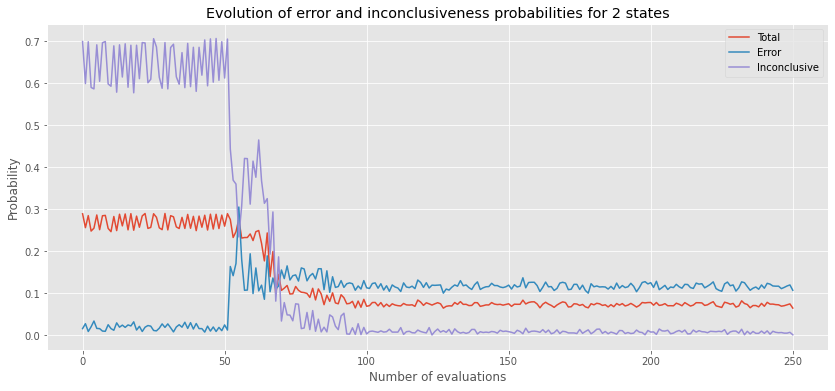

In [4]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Total', 'Error', 'Inconclusive'])
plt.title('Evolution of error and inconclusiveness probabilities for 2 states')
plt.show()

### Three states

In [5]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)
χ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.6
α_inc = 0.4
discriminator = nnd([ψ, ϕ, χ], True, α_err, α_inc)

data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Results: (array([ 1.17648659,  0.32597714, -0.22906776, -0.0757805 ,  0.11084291,
        3.17702419,  5.64813237, -0.17751549,  0.50752294,  2.1847722 ,
        0.34121732, -1.04528082,  1.03808117, -0.22000688,  0.7422436 ,
       -0.06151058, -0.90288365, -0.7090472 ,  0.34743776]), 0.22109375, 200)


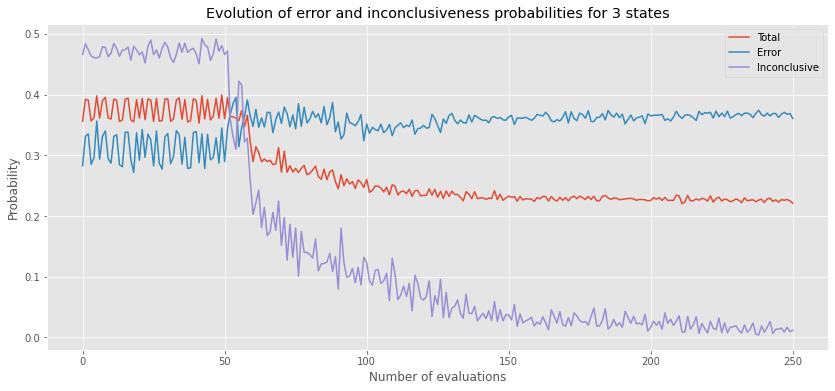

In [6]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Total', 'Error', 'Inconclusive'])
plt.title('Evolution of error and inconclusiveness probabilities for 3 states')
plt.show()

### Three states with noise

In [7]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(2)
χ = QuantumState.random(3)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.6
α_inc = 0.4
discriminator = nnd([ψ, ϕ, χ], True, α_err, α_inc)

data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Results: (array([-1.98039383e+00,  2.13407212e-01, -6.22870226e-01,  8.57574318e-02,
       -1.14164810e-01,  3.19077679e+00,  4.32182327e+00,  3.67293347e-01,
        5.85489185e-01, -3.14942533e+00,  1.11765325e+00, -1.22238170e+00,
        1.25660090e+00, -2.97812606e-03, -3.73848658e-01, -4.67349060e-01,
       -5.45814791e-01,  9.98848090e-01,  1.91060042e-01]), 0.30121527777777773, 200)


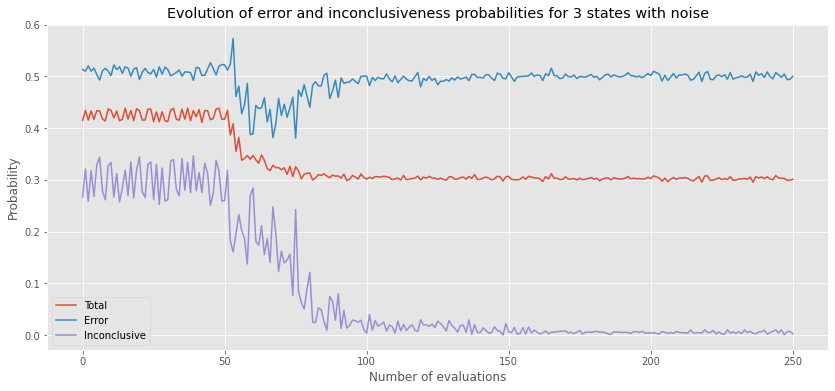

In [8]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Total', 'Error', 'Inconclusive'])
plt.title('Evolution of error and inconclusiveness probabilities for 3 states with noise')
plt.show()